# Sentiment Analysis of Airline Reviews

In [16]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import spacy
nlp = spacy.load('en_core_web_lg')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [17]:
df = pd.read_csv('airline_df_cleaned.csv')
reviews = df[['Country','Airline','Review','Cleaned_Review','Sentiment']].copy(deep=True)
reviews.head()

,Country,Airline,Review,Cleaned_Review,Sentiment
0,China,Air China,los angeles beijing return food low quality st...,los angeles beijing return food quality staff ...,Negative
1,China,Air China,round trip from hong kong to munich the main r...,round trip hong kong munich main reason fly ai...,Negative
2,China,Air China,sydney beijing paris then rome beijing to sydn...,sydney beijing paris rome beijing sydney famil...,Negative
3,China,Air China,london to sydney return via beijing a cheap fl...,london sydney return beijing cheap flight live...,Negative
4,China,Air China,beijing to shanghai only one check in desk for...,beijing shanghai check desk standby passenger ...,Positive


In [18]:
reviews['Review'][0]

'los angeles beijing return food low quality staff appear when time for mandatory service large screen view on main bulkhead without sound on both trip they be old 747 it seem staff have something to say at irregular interval make it hard to try and sleep but they be very good at make business transaction ignore everyone so they could count money and look at receipt you want a cheap very basic airline trip to china then this be the airline for you'

In [19]:
reviews['Cleaned_Review'][0]

'los angeles beijing return food quality staff appear time mandatory service large screen view main bulkhead sound trip 747 staff irregular interval hard sleep business transaction ignore count money receipt cheap basic trip china'

In [20]:
def remove_digits(text):
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Just extra clean up
    pattern = r'\b(\w+)\s+\1\b'
    text = re.sub(pattern, r'\1', text)
    return text

reviews['Review2'] = reviews['Review'].apply(remove_digits)

reviews['Cleaned_Review2'] = reviews['Cleaned_Review'].apply(remove_digits)

In [21]:
reviews['Review2'][0]

'los angeles beijing return food low quality staff appear when time for mandatory service large screen view on main bulkhead without sound on both trip they be old it seem staff have something to say at irregular interval make it hard to try and sleep but they be very good at make business transaction ignore everyone so they could count money and look at receipt you want a cheap very basic airline trip to china then this be the airline for you'

In [22]:
reviews['Cleaned_Review2'][0]

'los angeles beijing return food quality staff appear time mandatory service large screen view main bulkhead sound trip staff irregular interval hard sleep business transaction ignore count money receipt cheap basic trip china'

In [8]:
# Tokenizing the each review using word_tokenize
corpus = []
for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review2'][i])
    review = ' '.join(review)
    corpus.append(review)

corpus[0]

'los angeles beijing return food low quality staff appear when time for mandatory service large screen view on main bulkhead without sound on both trip they be old it seem staff have something to say at irregular interval make it hard to try and sleep but they be very good at make business transaction ignore everyone so they could count money and look at receipt you want a cheap very basic airline trip to china then this be the airline for you'

In [9]:
corpus = [word_tokenize(x)for x in corpus]
print(corpus[0])

['los', 'angeles', 'beijing', 'return', 'food', 'low', 'quality', 'staff', 'appear', 'when', 'time', 'for', 'mandatory', 'service', 'large', 'screen', 'view', 'on', 'main', 'bulkhead', 'without', 'sound', 'on', 'both', 'trip', 'they', 'be', 'old', 'it', 'seem', 'staff', 'have', 'something', 'to', 'say', 'at', 'irregular', 'interval', 'make', 'it', 'hard', 'to', 'try', 'and', 'sleep', 'but', 'they', 'be', 'very', 'good', 'at', 'make', 'business', 'transaction', 'ignore', 'everyone', 'so', 'they', 'could', 'count', 'money', 'and', 'look', 'at', 'receipt', 'you', 'want', 'a', 'cheap', 'very', 'basic', 'airline', 'trip', 'to', 'china', 'then', 'this', 'be', 'the', 'airline', 'for', 'you']


In [10]:
# Building the Word2Vec model

gensim_model = Word2Vec(vector_size=100, window=5, min_count=2, workers=4, seed=42)

gensim_model.build_vocab(corpus)

gensim_model.train(corpus, total_examples=gensim_model.corpus_count, epochs=gensim_model.epochs)


(6838243, 9804465)

In [11]:
gensim_model.wv.most_similar('airline')

[('carrier', 0.7926662564277649),
 ('company', 0.7607354521751404),
 ('airlines', 0.6958811283111572),
 ('emirate', 0.5890130400657654),
 ('review', 0.5590554475784302),
 ('sq', 0.5540882349014282),
 ('ana', 0.5437105298042297),
 ('sia', 0.5154980421066284),
 ('route', 0.4977226257324219),
 ('aspect', 0.4912148118019104)]

In [12]:
gensim_model.wv.similarity('india', 'china')

0.91414684

In [23]:
reviews.to_csv('airline_df_nlped.csv',index=False)

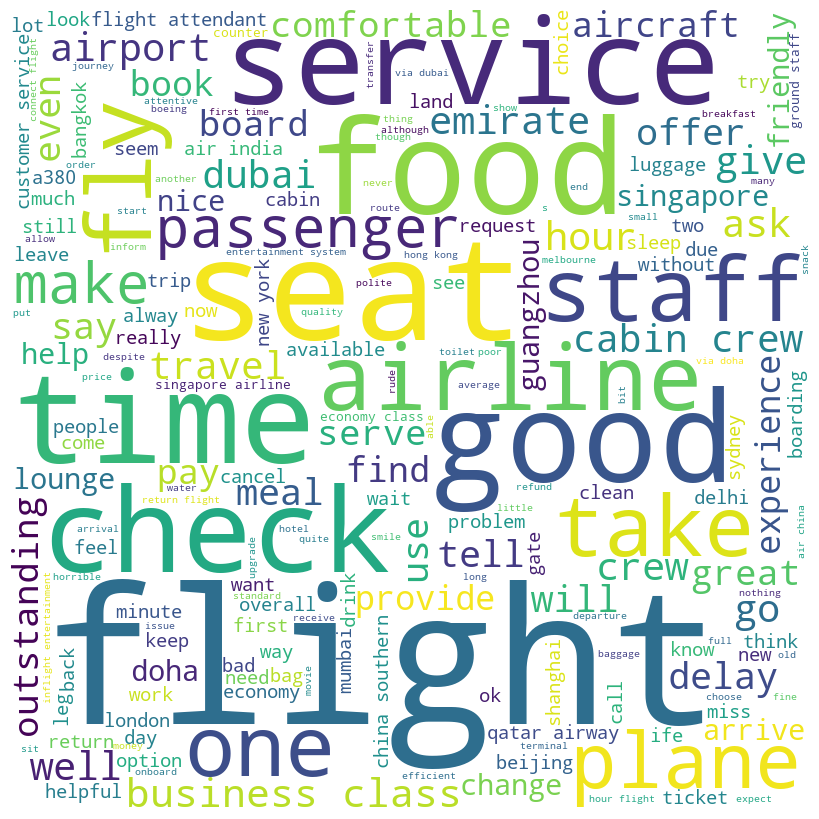

In [14]:
# Making a word cloud from the reviews2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review2'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x)for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

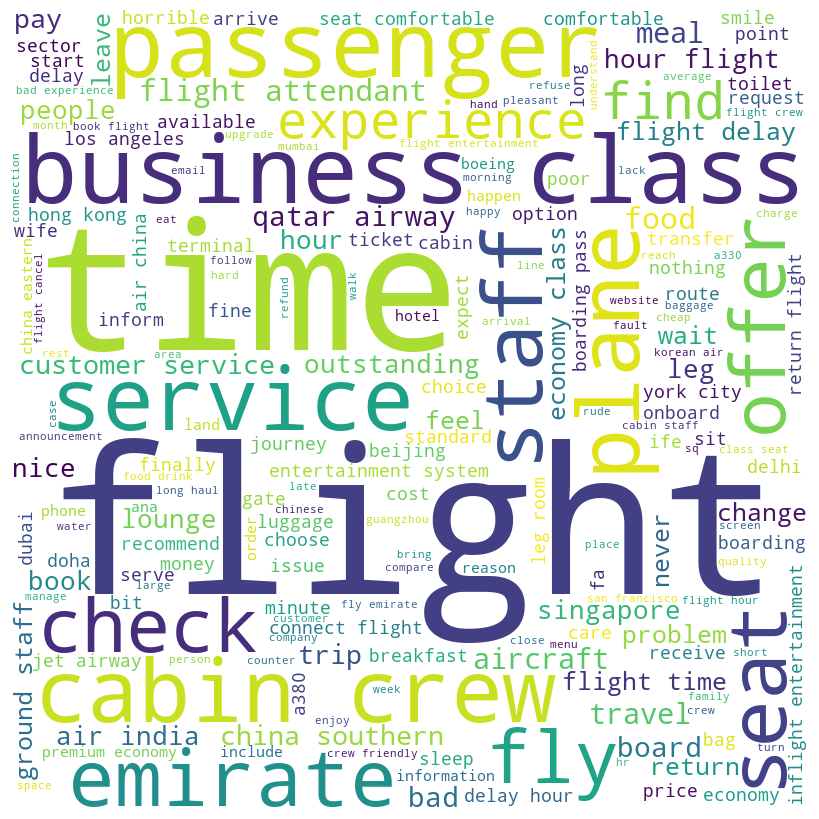

In [15]:
# Making a word cloud from the cleaned Cleaned_Review2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Cleaned_Review2'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x) for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()